In [1]:
from ect.tracking import FECTTransformer, FECTCorrTransformer
from ect.helpers import RandomImageGenerator
from ect import Config

import numpy as np
from matplotlib import pyplot as plt

In [2]:

gen = RandomImageGenerator('/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test', 10)

### FECT Transformer

In [3]:
tr = FECTTransformer(Config(ect_offset_value_px=10), (314, 100))

2024-05-13 23:32:44.133 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-05-13 23:32:44.137 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping
2024-05-13 23:32:44.335 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:78 - Running logpolar transform in offset mode
2024-05-13 23:32:44.338 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


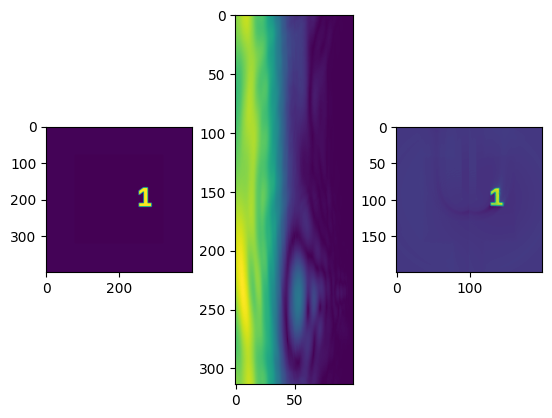

In [4]:
img = gen.generate()
ect = tr.transform(img)
inv = tr.invert(ect)

plt.subplot(1, 3, 1)
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.imshow(np.abs(ect))

plt.subplot(1, 3, 3)
plt.imshow(np.real(inv))

### FECT Corr Transformer

In [11]:
tr = FECTCorrTransformer(Config(), (314, 100))

2024-05-13 23:46:22.013 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-05-13 23:46:22.016 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping
2024-05-13 23:46:22.193 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:78 - Running logpolar transform in offset mode
2024-05-13 23:46:22.196 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


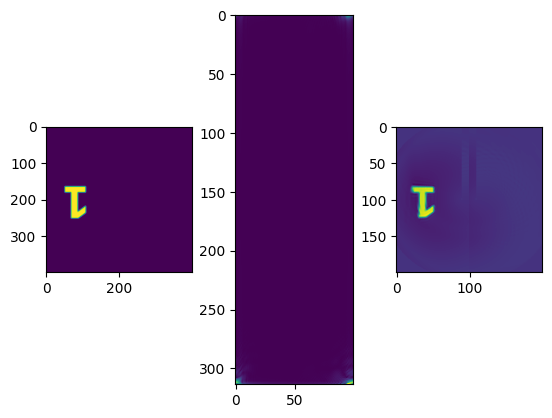

In [20]:
img = gen.generate()
ect = tr.transform(img)
inv = tr.invert(ect)

plt.subplot(1, 3, 1)
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.imshow(np.abs(ect))

plt.subplot(1, 3, 3)
plt.imshow(np.real(inv))